![The Harmony Project logo](https://raw.githubusercontent.com/harmonydata/brand/main/Logo/PNG/%D0%BB%D0%BE%D0%B3%D0%BE%20%D1%84%D1%83%D0%BB-05.png)

<a href="https://harmonydata.ac.uk"><span align="left">🌐 harmonydata.ac.uk</span></a>
<a href="https://github.com/harmonydata/harmony"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/github-mark.svg" alt="Harmony Python package | Github" width="21px"/></a>
<a href="https://www.linkedin.com/company/harmonydata"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/linkedin.svg" alt="Harmony | LinkedIn" width="21px"/></a>
<a href="https://twitter.com/harmony_data"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/x.svg" alt="Harmony | X" width="21px"/></a>
<a href="https://www.instagram.com/harmonydata/"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/instagram.svg" alt="Harmony | Instagram" width="21px"/></a>
<a href="https://www.facebook.com/people/Harmony-Project/100086772661697/"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/fb.svg" alt="Harmony | Facebook" width="21px"/></a>
<a href="https://www.youtube.com/channel/UCraLlfBr0jXwap41oQ763OQ"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/yt.svg" alt="Harmony | YouTube" width="21px"/></a>

# Harmony walkthrough - Python library

You can run this notebook in Google Colab: <a href="https://colab.research.google.com/github/harmonydata/harmony/blob/main/Harmony_example_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how you can use Harmony to find the similarity matrix between two questionnaires from Harmony's database, and a third questionnaire which you input here (Norwegian GAD-7).

Harmony is a data harmonisation tool that uses natural language
processing to recognise where questions in questionnaires are semantically similar. Harmony is a collaboration project between [Ulster University](https://ulster.ac.uk/), [University College London](https://ucl.ac.uk/), the [Universidade Federal de Santa Maria](https://www.ufsm.br/), and [Fast Data Science](http://fastdatascience.com/).  Harmony is funded by [Wellcome](https://wellcome.org/) as part of the [Wellcome Data Prize in Mental Health](https://wellcome.org/grant-funding/schemes/wellcome-mental-health-data-prize).

This walkthrough lets you compare items where questions have already been extracted from the PDFs. If you want to process PDFs, you also need to install
Java and [Apache Tika](https://tika.apache.org/) - see the Harmony README.

![my badge](https://badgen.net/badge/Status/In%20Development/orange)

[![PyPI package](https://img.shields.io/badge/pip%20install-harmonydata-brightgreen)](https://pypi.org/project/harmonydata/)


## Install the Harmony Python library from Pypi

In [1]:
!pip install harmonydata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

Also install Matplotlib because we would like to do some plots in this demo. But this is not generally needed for Harmony.

In [2]:
!pip install matplotlib

## Import the library and check the version

In [3]:
import harmony

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)


.gitattributes:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O1.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O2.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O3.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O4.onnx:   0%|          | 0.00/235M [00:00<?, ?B/s]

model_qint8_arm64.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

model_qint8_avx512.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

model_qint8_avx512_vnni.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

model_quint8_avx2.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

openvino/openvino_model.xml:   0%|          | 0.00/399k [00:00<?, ?B/s]

openvino_model_qint8_quantized.bin:   0%|          | 0.00/119M [00:00<?, ?B/s]

(…)nvino/openvino_model_qint8_quantized.xml:   0%|          | 0.00/709k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

What version of Harmony are we on?

In [4]:
harmony.__version__

'1.0.1'

In [5]:
from harmony import create_instrument_from_list

gad_7_norwegian = create_instrument_from_list(["Følt deg nervøs, engstelig eller veldig stresset",
                   "Ikke klart å slutte å bekymre deg eller kontrolleren bekymringene dine"],
                  instrument_name="GAD-7 Norwegian")

In [6]:
instruments = [harmony.example_instruments["CES_D English"],
               harmony.example_instruments["GAD-7 Portuguese"],
               gad_7_norwegian]

In [7]:
questions, similarity, query_similarity, new_vectors_dict = harmony.match_instruments(instruments)

# From 1.0.2 this will be
# match_response = harmony.match_instruments(instruments)
# questions = match_response.questions
# similarity = match_response.similarity_with_polarity
# query_similarity = match_response.query_similarity
# instrument_to_instrument_similarities = match_response.instrument_to_instrument_similarities

See the questions

In [8]:
for q in questions:
    print (q.question_text)

I was bothered by things that usually don’t bother me.
I did not feel like eating; my appetite was poor.
I felt that I could not shake off the blues even with help from my family or friends.
I felt I was just as good as other people.
I had trouble keeping my mind on what I was doing.
I felt depressed.
I felt that everything I did was an effort.
I felt hopeful about the future.
I thought my life had been a failure.
I felt fearful.
My sleep was restless.
I was happy.
I talked less than usual.
I felt lonely.
People were unfriendly.
I enjoyed life.
I had crying spells.
I felt sad.
I felt that people dislike me.
I could not get “going.”
Sentir-se nervoso/a, ansioso/a ou muito tenso/a
Não ser capaz de impedir ou de controlar as preocupações
Preocupar-se muito com diversas coisas
Dificuldade para relaxar
Ficar tão agitado/a que se torna difícil permanecer sentado/a
Ficar facilmente aborrecido/a ou irritado/a
Sentir medo como se algo horrível fosse acontecer
Følt deg nervøs, engstelig eller ve

See the similarity matrix

In [9]:
similarity

array([[ 1.        ,  0.31365012,  0.34323075, -0.26082835,  0.42788812,
         0.34054826, -0.3074893 , -0.18449382, -0.25914563,  0.31232795,
         0.28057174, -0.28101035,  0.48577073,  0.27214028, -0.28000391,
        -0.1989061 ,  0.2869449 ,  0.31094228,  0.3754597 ,  0.28829139,
         0.3378802 ,  0.44290323,  0.438708  , -0.26580206,  0.38783188,
         0.53001133,  0.25845853,  0.34834389,  0.4759781 ],
       [ 0.31365012,  1.        ,  0.32531283, -0.3844969 , -0.39382813,
        -0.43607551, -0.44434266, -0.23701804, -0.46996572, -0.36608222,
        -0.3449358 , -0.2956176 ,  0.36299874,  0.38550648, -0.20762319,
        -0.30174485, -0.41118524, -0.42717949, -0.33941373,  0.37951923,
        -0.31706227,  0.11435868, -0.11078689, -0.19496468, -0.25027672,
        -0.14382353, -0.24803396, -0.29994106, -0.12476518],
       [ 0.34323075,  0.32531283,  1.        , -0.45727843,  0.36003788,
         0.44618645, -0.4240064 , -0.30709131, -0.40909897,  0.34075579,
  

## Plot the similarity matrix

In [10]:
import matplotlib.pyplot as plt

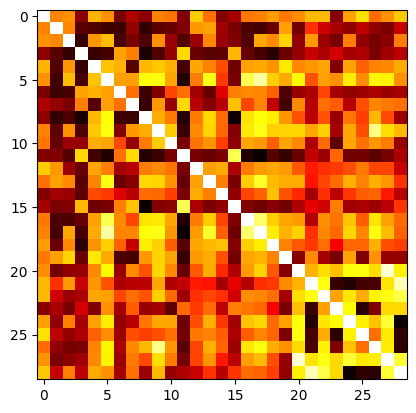

In [11]:
plt.imshow(similarity, cmap='hot', interpolation='nearest')

## Generate a crosswalk table

In [12]:
from harmony.matching.generate_crosswalk_table import generate_crosswalk_table

In [13]:
threshold = 0.6

In [14]:
df_crosswalk_table = generate_crosswalk_table(questions, similarity, threshold)


In [15]:
df_crosswalk_table

,pair_name,question1_no,question1_text,question2_no,question2_text,match_score
0,5_8,6,I felt depressed.,9,I thought my life had been a failure.,0.610593
1,5_9,6,I felt depressed.,10,I felt fearful.,0.623488
2,5_13,6,I felt depressed.,14,I felt lonely.,0.634577
3,5_16,6,I felt depressed.,17,I had crying spells.,0.721136
4,5_17,6,I felt depressed.,18,I felt sad.,0.849691
5,8_17,9,I thought my life had been a failure.,18,I felt sad.,0.612484
6,9_17,10,I felt fearful.,18,I felt sad.,0.635321
7,9_26,10,I felt fearful.,7,Sentir medo como se algo horrível fosse acontecer,0.811445
8,11_15,12,I was happy.,16,I enjoyed life.,0.727979
9,13_17,14,I felt lonely.,18,I felt sad.,0.664185


In [15]:
# From version 1.0.2, you can adjust the crosswalk function's behaviour
df_crosswalk_table = generate_crosswalk_table(questions, similarity, threshold, is_allow_within_instrument_matches=True, is_enforce_one_to_one: bool = True)
